In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [132]:
N = 1000
turns = np.arange(N)*1/43.45e3
T = turns[1] - turns[0]  # sampling interval = 1
fs = 1 / T  # sampling frequency

In [133]:
def take_fft():
    phi_0 = 1e-8  # amplitude of noise, aka stdPhaseNoise 
    Delta_psi = 0.18 # the peak of the spectrum

    psi_t_list = []
    psi_t = 0

    # parameters for ksi
    mean = 0.0
    std = 0.03
    for i in turns:
        psi_t_list.append(psi_t)
        ksi = np.random.normal(mean, std)  # different seed on each turn
        psi_t = psi_t + 2 * np.pi * Delta_psi + 2 * np.pi * ksi

    # Construct the noise signal
    y = phi_0 * np.cos(psi_t_list)
    
    my_fft = np.fft.fft(y)
    
    return my_fft

In [134]:
my_fft_list = [take_fft() for _ in range(10000)] 

In [135]:
mean_fft = np.mean(my_fft_list, axis=0)

In [136]:
my_f = np.linspace(0, 1/T, N)

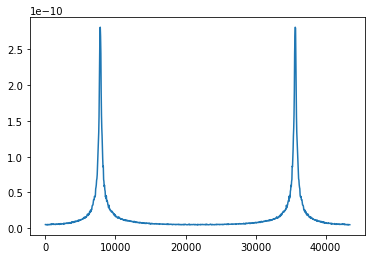

In [149]:
plt.plot(my_f, np.abs(mean_fft)/N)

In [159]:
Pxx_fft = (np.abs(mean_fft)/N)**2

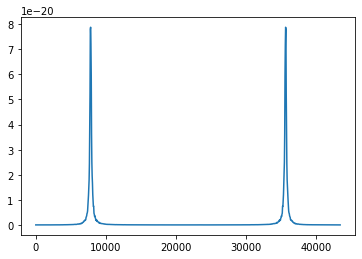

In [160]:
plt.plot(my_f, Pxx_fft)

In [162]:
np.mean(Pxx_fft)*43.45e3

6.33250116055575e-17

In [152]:
np.var(mean_fft)

1.357422591612371e-15

In [163]:
total = np.mean(Pxx_fft)*43.45e3
print(total)

6.33250116055575e-17


ValueError: x and y must have same first dimension, but have shapes (1000,) and (100000,)

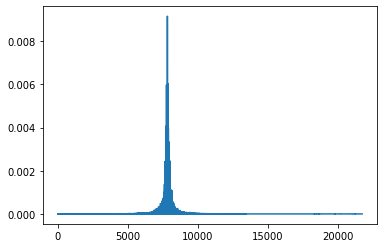

In [164]:
f, Pxx_den = signal.periodogram(y, fs)
plt.plot(f, Pxx_den)
plt.plot(my_f, np.abs(my_fft)/N)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.yscale('log')
plt.show()

In [63]:
Pxx_den_fft = 2*np.abs(my_fft)**2/N

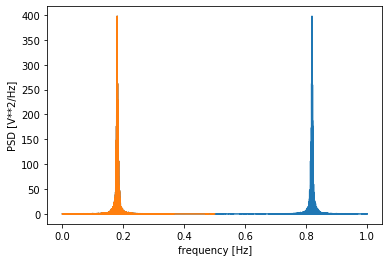

In [64]:
f, Pxx_den = signal.periodogram(y, fs)
plt.plot(my_f, Pxx_den_fft)
plt.plot(f, Pxx_den)

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.yscale('log')
plt.show()

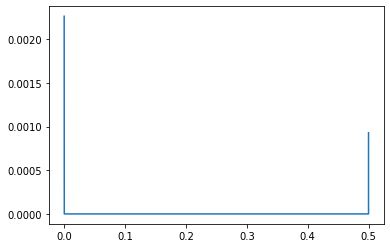

In [65]:
plt.plot(f, Pxx_den_fft[:N//2+1]- Pxx_den)

In [66]:
Pxx_den_fft_half = Pxx_den_fft[:N//2+1]

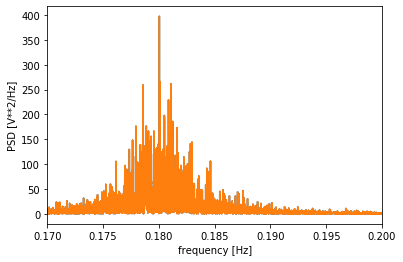

In [72]:
plt.plot(f, Pxx_den_fft_half)
plt.plot(f, Pxx_den)

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(0.17, 0.2)
#plt.yscale('log')
plt.show()


In [49]:
Pxx_den[-10:]

array([8.20550038e-20, 6.95470048e-19, 1.05738479e-18, 5.04322339e-19,
       7.40462871e-19, 8.40079628e-19, 2.34087665e-18, 1.60080035e-18,
       1.59119387e-19, 2.73721512e-18])

In [50]:
Pxx_den_fft_half[-10:]

array([8.20550038e-20, 6.95470048e-19, 1.05738479e-18, 5.04322339e-19,
       7.40462871e-19, 8.40079628e-19, 2.34087665e-18, 1.60080035e-18,
       1.59119387e-19, 5.47443025e-18])

In [28]:
np.mean(Pxx_den)

9.983449118627148e-17

In [26]:
np.max(Pxx_den)

2.262094964220769e-14

In [676]:
1e-8**2


1.0000000000000001e-16

In [689]:
print('The total noise power as obtained from signal processing is {}'.format(np.mean(Pxx_den*0.5)))

The total noise power as obtained from signal processing is 4.919783695558518e-17


In [690]:
print('The PSD at vb {} A.U^2/Hz'.format(np.max(Pxx_den)))

The PSD at vb 2.62344688814547e-15 A.U^2/Hz


In [691]:
# confirm that is indeed at vb
index = np.argmax(Pxx_den)

In [692]:
Pxx_den[181]

6.00142600969198404e-16

In [655]:
print(index)

408


In [611]:
f[index]

16163.400000000001

In [612]:
43.45e3/2-f[index]

5561.5999999999985

In [613]:
Pxx_den[index]

7.444706825780103618e-21

In [614]:
Pxx_den[180]/2

1.6039021548032455787e-21

In [601]:
0.18*frev

7821.0

In [249]:
to maximum den einai sto vb

SyntaxError: invalid syntax (<ipython-input-249-4815e317559c>, line 1)